# Laboratorio 4: Método Simplex y sus Variaciones

Santiago Casasbuenas - 202214932

Amalia Carbonell - 202122079 

## Problema 1: Implementación del Método Simplex Estándar

Implementar el método Simplex estándar para resolver el siguiente problema de programación lineal:

Maximizar:  
$$
Z = 3x_1 + 2x_2 + 5x_3 
$$

Sujeto a:  
$$
x_1 + x_2 + x_3 \leq 100  \\
2x_1 + x_2 + x_3 \leq 150 \\
x_1 + 4x_2 + 2x_3 \leq 80
$$

Con:  
$$
x_1, x_2, x_3 \geq 0 
$$



### 1. Convertir el problema a la forma estándar introduciendo variables de holgura.


**Agregamos variables de holgura \( s_1, s_2, s_3 \) para convertir las desigualdades en igualdades:**
$$
\begin{aligned}
x_1 + x_2 + x_3 + s_1 &= 100 \\
2x_1 + x_2 + x_3 + s_2 &= 150 \\
x_1 + 4x_2 + 2x_3 + s_3 &= 80 \\
x_1, x_2, x_3, s_1, s_2, s_3 &\geq 0
\end{aligned}
$$



**Nueva función objetivo (forma estándar):**


$$
Z = 3x_1 + 2x_2 + 5x_3 + 0s_1 + 0s_2 + 0s_3
$$

In [1]:
import numpy as np


def simplex(c, A, b):
    """
    c: Coeficientes de la función objetivo
    A: Matriz de restricciones 
    b: Vector de términos independientes
    """
    num_variables = len(c)
    num_restric = len(b)
    
    # Construimos la tabla inicial (matriz aumentada)
    tableau = np.zeros((num_restric + 1, num_variables + 1))
    tableau[:num_restric, :num_variables] = A
    tableau[:num_restric, -1] = b
    tableau[-1, :num_variables] = c  # fila de función objetivo

    iteracion = 0
    while True:
        print(f"\n Iteración {iteracion}")
        print(tableau)

        #Verificar si ya es óptima
        if np.all(tableau[-1, :-1] >= 0):
            print("\n Solución óptima encontrada.")
            break

        # Seleccionar variable de entrada 
        col_pivot = np.argmin(tableau[-1, :-1])
        
        # Paso 3: Calcular razones θ (evitar división por cero o negativo)
        ratios = []
        for i in range(num_restric):
            if tableau[i, col_pivot] > 0:
                ratios.append(tableau[i, -1] / tableau[i, col_pivot])
            else:
                ratios.append(np.inf)

        # Verificar si el problema es ilimitado
        if all(r == np.inf for r in ratios):
            print("El problema es ilimitado.")
            return None

        row_pivot = np.argmin(ratios)
        pivot = tableau[row_pivot, col_pivot]

        # Hacer pivoteo
        tableau[row_pivot, :] /= pivot
        for i in range(num_restric + 1):
            if i != row_pivot:
                tableau[i, :] -= tableau[i, col_pivot] * tableau[row_pivot, :]

        iteracion += 1

    return tableau


In [2]:
# Coeficientes de la función objetivo (3x1,2x2, 5x3), como se maximiza se ponen negativos. 

c = np.array([-3, -2, -5, 0, 0, 0], dtype=float)  # x1, x2, x3, s1, s2, s3
A = np.array([
    [1, 1, 1, 1, 0, 0],   # x_1 + x_2 + x_3 + s_1 = 100 
    [2, 1, 1, 0, 1, 0],   # 2x_1 + x_2 + x_3 + s_2 = 150
    [1, 4, 2, 0, 0, 1]    # x_1 + 4x_2 + 2x_3 + s_3 = 80 
], dtype=float)

# Vector valores restriccion
b = np.array([100, 150, 80], dtype=float)

In [3]:
tabla_final = simplex(c, A, b)


 Iteración 0
[[  1.   1.   1.   1.   0.   0. 100.]
 [  2.   1.   1.   0.   1.   0. 150.]
 [  1.   4.   2.   0.   0.   1.  80.]
 [ -3.  -2.  -5.   0.   0.   0.   0.]]

 Iteración 1
[[  0.5  -1.    0.    1.    0.   -0.5  60. ]
 [  1.5  -1.    0.    0.    1.   -0.5 110. ]
 [  0.5   2.    1.    0.    0.    0.5  40. ]
 [ -0.5   8.    0.    0.    0.    2.5 200. ]]

 Iteración 2
[[  0.          -0.66666667   0.           1.          -0.33333333
   -0.33333333  23.33333333]
 [  1.          -0.66666667   0.           0.           0.66666667
   -0.33333333  73.33333333]
 [  0.           2.33333333   1.           0.          -0.33333333
    0.66666667   3.33333333]
 [  0.           7.66666667   0.           0.           0.33333333
    2.33333333 236.66666667]]

 Solución óptima encontrada.


In [4]:
nombres_variables = ['x1', 'x2', 'x3', 'x4 (s1)', 'x5 (s2)', 'x6 (s3)']
num_filas, num_columnas = tabla_final.shape
soluciones = np.zeros(num_columnas - 1) 


for col in range(num_columnas - 1):
    columna = tabla_final[:-1, col]  # evitar la fila de Z
    if np.count_nonzero(columna) == 1 and np.isclose(np.max(columna), 1):
        fila = np.argmax(columna)
        soluciones[col] = tabla_final[fila, -1]  #resultado 


print("\nSolución óptima encontrada:")
print(f"Z = {tabla_final[-1, -1]:.2f}")
for i, nombre in enumerate(nombres_variables):
    print(f"{nombre} = {soluciones[i]:.2f}")


Solución óptima encontrada:
Z = 236.67
x1 = 73.33
x2 = 0.00
x3 = 3.33
x4 (s1) = 23.33
x5 (s2) = 0.00
x6 (s3) = 0.00


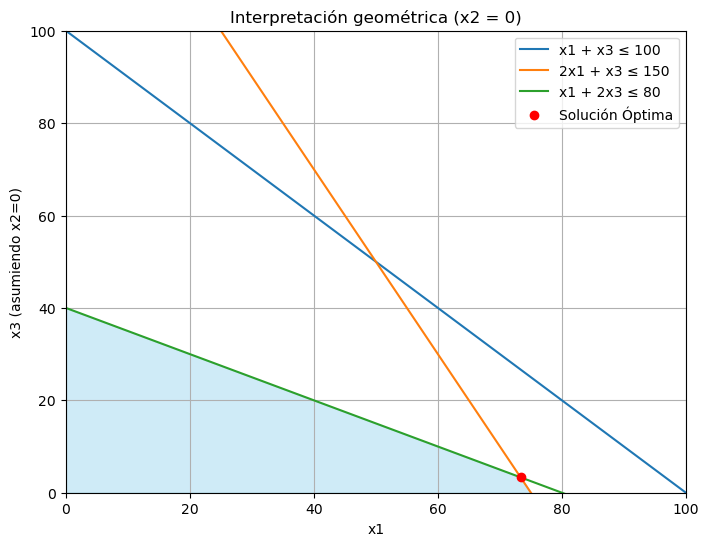

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Crear valores de x1 para graficar
x1_vals = np.linspace(0, 100, 200)

# Proyectamos restricciones al plano x1-x3 (asumimos x2 = 0)
x3_r1 = 100 - x1_vals         # de: x1 + x3 <= 100
x3_r2 = 150 - 2 * x1_vals     # de: 2x1 + x3 <= 150
x3_r3 = (80 - x1_vals) / 2    # de: x1 + 2x3 <= 80 → x3 = (80 - x1)/2

plt.figure(figsize=(8,6))
plt.plot(x1_vals, x3_r1, label='x1 + x3 ≤ 100')
plt.plot(x1_vals, x3_r2, label='2x1 + x3 ≤ 150')
plt.plot(x1_vals, x3_r3, label='x1 + 2x3 ≤ 80')

# Colorear región factible
plt.fill_between(x1_vals, 0, np.minimum(np.minimum(x3_r1, x3_r2), x3_r3), where=(np.minimum(np.minimum(x3_r1, x3_r2), x3_r3)>=0), color='skyblue', alpha=0.4)

# Graficar la solución óptima
x1_opt = 73.33
x3_opt = 3.33
plt.plot(x1_opt, x3_opt, 'ro', label='Solución Óptima')

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('x1')
plt.ylabel('x3 (asumiendo x2=0)')
plt.title('Interpretación geométrica (x2 = 0)')
plt.grid(True)
plt.legend()
plt.show()


## Problema 2: Implementación del Método Simplex Dual Phase

Minimizar
$$
Z = 5x_1 - 4x_2 + 3x_3
$$

sujeto a 
$$
2x_1 + x_2 - x_3 = 10 \\
x_1 - 3x_2 + 2x_3 \geq 5 \\
x_1 + x_2 + x_3 \leq 15\\
x_1, x_2, x_3 \geq 0
$$


### Procedimiento:

#### Convertir el problema a la forma estándar, transformando la minimización en maximización, convirtiendo las desigualdades en igualdades mediante variables de holgura y/o exceso, y asegurando que los términos independientes sean no negativos.

##### 1.1 Convertir el problema en forma estándar
Multiplicamos ambos lados de la ecuacion por -1 para obtener un problema de maximización:

Minimizar: $Z = 5x_1 - 4x_2 + 3x_3$ 

Maximizar: $Z^{'} = -5x_1 + 4x_2 - 3x_3$

##### 1.2 Convertir todas las restricciones a igualdades

- **Para las restricciones `≤`**: Agregamos variables de holgura.
- **Para las restricciones `≥`**: Agregamos variables de exceso y artificiales.
- **Para las restricciones `=`**: Agregamos variables artificiales si no se puede construir una SBF directamente.

**Restricción 1 original:** 

$$2x_1 + x_2 - x_3 = 10$$

Agregamos una variable artificial $a_1$ para poder formar una base:

$$2x_1 + x_2 - x_3 + a_1 = 10$$

**Restricción 2 original:**

$$x_1 - 3x_2 + 2x_3 \geq 5 $$

Convertimos en una igualdad a partir de restar una variable de exceso $e_1$ y sumar una variable artificial $a_2$:

$$x_1 - 3x_2 + 2x_3 - e_1 + a_2 = 5 $$

**Restricción 3 original:**

$$x_1 + x_2 + x_3 \leq 15$$

Añadimos una variable de holgura $s_1$:

$$x_1 + x_2 + x_3 + s_1 = 15$$


**Nuevas restricciones:**

$$
2x_1 + x_2 - x_3 + a_1 = 10 \\
x_1 - 3x_2 + 2x_3 - e_1 + a_2 = 5 \\
x_1 + x_2 + x_3 + s_1 = 15
$$

##### 1.3 Asegurar que los términos independientes sean no negativos

Todas las ecuaciones son positivas al lado derecho, por lo cual, no se debe hacer ninguna transformación.

Por lo tanto, nuestro nuevo problema se ve de la siguiente forma:

**Maximizar:**

$$
Z^{'} = -5x_1 + 4x_2 - 3x_3
$$

**Sujeto a:**

$$
2x_1 + x_2 - x_3 + a_1 = 10 \\
x_1 - 3x_2 + 2x_3 - e_1 + a_2 = 5 \\
x_1 + x_2 + x_3 + s_1 = 15 \\
x_1, x_2, x_3, s_1, e_1, a_1, a_2 \geq 0
$$

#### Implementar el algoritmo del método Simplex de Dos Fases desde cero en Python

##### Preparación de modelo auxiliar (Fase 1)

Nuestro objetivo es minimizar la suma de las variables artificiales:

**Minimizar**
$$
W  = a_1 + a_2
$$



Podemos hacerlo como problema de maximización usando:

**Maximizar**
$$
-W = -a_1 -a_2
$$

Entonces, preparamos la matriz del problema a partir de la construcción de un tableau inicial para la fase 1:

In [6]:
import numpy as np

# Variables: x1, x2, x3, s1, e1, a1, a2
# Orden:     x1 x2 x3 s1 e1 a1 a2 RHS
n_vars = 7  # Número de variables (sin incluir RHS)
tableau = []

# R1: 2x1 + x2 - x3 + a1 = 10
tableau.append([2, 1, -1, 0, 0, 1, 0, 10])

# R2: x1 - 3x2 + 2x3 - e1 + a2 = 5
tableau.append([1, -3, 2, 0, -1, 0, 1, 5])

# R3: x1 + x2 + x3 + s1 = 15
tableau.append([1, 1, 1, 1, 0, 0, 0, 15])

# Función objetivo auxiliar (W = a1 + a2 → -W = -a1 - a2)
# Notamos que las variables artificiales tienen coeficiente -1
# Luego ajustamos para que la fila Z represente la suma negativa de las filas artificiales
Z_row = [0] * (n_vars + 1)  # inicializar fila objetivo con ceros (sin RHS aún)
for i in range(2):  # artificiales están en las dos primeras filas
    for j in range(n_vars + 1):
        Z_row[j] -= tableau[i][j]  # restar la fila para formar el -W
tableau.append(Z_row)

# Convertir a array para facilitar operaciones
tableau = np.array(tableau, dtype=float)

# Mostrar tableau inicial
print("Tableau Inicial (Fase I):")
print(tableau)


Tableau Inicial (Fase I):
[[  2.   1.  -1.   0.   0.   1.   0.  10.]
 [  1.  -3.   2.   0.  -1.   0.   1.   5.]
 [  1.   1.   1.   1.   0.   0.   0.  15.]
 [ -3.   2.  -1.   0.   1.  -1.  -1. -15.]]


Con este código resolvemos inicialmente:

1. Conversión de restricciones en igualdades.

2. Inclusión de variables de holgura, exceso y artificiales.

3. Construcción de tableau inicial con la función objetivo auxiliar $-a_1 -a_2$

##### Ejecutar iteraciones simplex (Fase 1)

Buscamos ser capaces de implementar un proceso iterativo que:

1. Busque una columna pivote (la variable de entrada a la base)

2. Calcule la fila pivote (variable de salida de la base)

3. Actualice el tableau con operaciones de fila (pivoteo)

4. Repita hasta que no haya mejoras posibles en la función objetivo auxiliar (esto lo conseguimos cuando todos los coeficientes de la fila Z sean ≥ 0)

In [7]:
def simplex_iteration(tableau, max_iter=100):
    n_rows, n_cols = tableau.shape
    for it in range(max_iter):
        print(f"\nIteración {it + 1}")
        print(tableau)

        # Paso 1: Buscar columna pivote (más negativo en Z)
        cost_row = tableau[-1, :-1]
        if all(cost_row >= 0):
            print("\nNo hay más coeficientes negativos en Z. Óptimo alcanzado.")
            break

        pivot_col = np.argmin(cost_row)

        # Paso 2: Calcular razones (theta)
        ratios = []
        for i in range(n_rows - 1):
            element = tableau[i, pivot_col]
            if element > 0:
                ratio = tableau[i, -1] / element
                ratios.append(ratio)
            else:
                ratios.append(np.inf)

        if all(r == np.inf for r in ratios):
            print("Problema ilimitado.")
            return tableau, False

        pivot_row = np.argmin(ratios)

        # Paso 3: Pivoteo
        pivot_element = tableau[pivot_row, pivot_col]
        tableau[pivot_row, :] /= pivot_element

        for i in range(n_rows):
            if i != pivot_row:
                multiplier = tableau[i, pivot_col]
                tableau[i, :] -= multiplier * tableau[pivot_row, :]

    return tableau, True


In [8]:
# Ejecutar la Fase I del Simplex
tableau_final, factible = simplex_iteration(tableau)

if factible:
    print("\nSe encontró una SBF (fase I completada).")
else:
    print("\nEl problema original es infactible.")



Iteración 1
[[  2.   1.  -1.   0.   0.   1.   0.  10.]
 [  1.  -3.   2.   0.  -1.   0.   1.   5.]
 [  1.   1.   1.   1.   0.   0.   0.  15.]
 [ -3.   2.  -1.   0.   1.  -1.  -1. -15.]]

Iteración 2
[[ 1.   0.5 -0.5  0.   0.   0.5  0.   5. ]
 [ 0.  -3.5  2.5  0.  -1.  -0.5  1.   0. ]
 [ 0.   0.5  1.5  1.   0.  -0.5  0.  10. ]
 [ 0.   3.5 -2.5  0.   1.   0.5 -1.   0. ]]

Iteración 3
[[ 1.  -0.2  0.   0.  -0.2  0.4  0.2  5. ]
 [ 0.  -1.4  1.   0.  -0.4 -0.2  0.4  0. ]
 [ 0.   2.6  0.   1.   0.6 -0.2 -0.6 10. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]

No hay más coeficientes negativos en Z. Óptimo alcanzado.

Se encontró una SBF (fase I completada).


##### Fase 2 completa

In [9]:
def preparar_fase_2(tableau_f1):
    # Eliminar columnas de artificiales (a1, a2 → columnas 5 y 6)
    tableau_f2 = np.delete(tableau_f1, [5, 6], axis=1)

    # Eliminar la fila de Z auxiliar
    tableau_f2 = tableau_f2[:-1, :]

    # Agregar nueva fila de Z (función objetivo original: -5x1 + 4x2 -3x3)
    # Las variables ahora están en orden: x1, x2, x3, s1, e1, RHS
    z_nueva = np.array([-5, 4, -3, 0, 0, 0], dtype=float)

    # Ajustar Z con respecto a las variables básicas (regla de costos)
    for i in range(len(tableau_f2)):
        var_basica = np.where(tableau_f2[i, :-1] == 1)[0]
        if len(var_basica) == 1:  # Está en forma canónica
            coef = z_nueva[var_basica[0]]
            z_nueva -= coef * tableau_f2[i, :]

    # Agregar Z como última fila
    tableau_f2 = np.vstack([tableau_f2, z_nueva])

    return tableau_f2


In [10]:
tableau_f2 = preparar_fase_2(tableau_final)

# Ejecutar la Fase II del Simplex
tabla_final_opt, exito = simplex_iteration(tableau_f2)

if exito:
    print("\n¡Solución óptima encontrada en Fase II!")
else:
    print("\nEl problema original es ilimitado.")



Iteración 1
[[ 1.  -0.2  0.   0.  -0.2  5. ]
 [ 0.  -1.4  1.   0.  -0.4  0. ]
 [ 0.   2.6  0.   1.   0.6 10. ]
 [ 0.  -1.2  0.   0.  -2.2 25. ]]

Iteración 2
[[ 1.          0.66666667  0.          0.33333333  0.          8.33333333]
 [ 0.          0.33333333  1.          0.66666667  0.          6.66666667]
 [ 0.          4.33333333  0.          1.66666667  1.         16.66666667]
 [ 0.          8.33333333  0.          3.66666667  0.         61.66666667]]

No hay más coeficientes negativos en Z. Óptimo alcanzado.

¡Solución óptima encontrada en Fase II!


#### Solución óptima, valor de la función objetivo y gráfica

##### Gráfica de Región asumiendo $X_3 = 0$

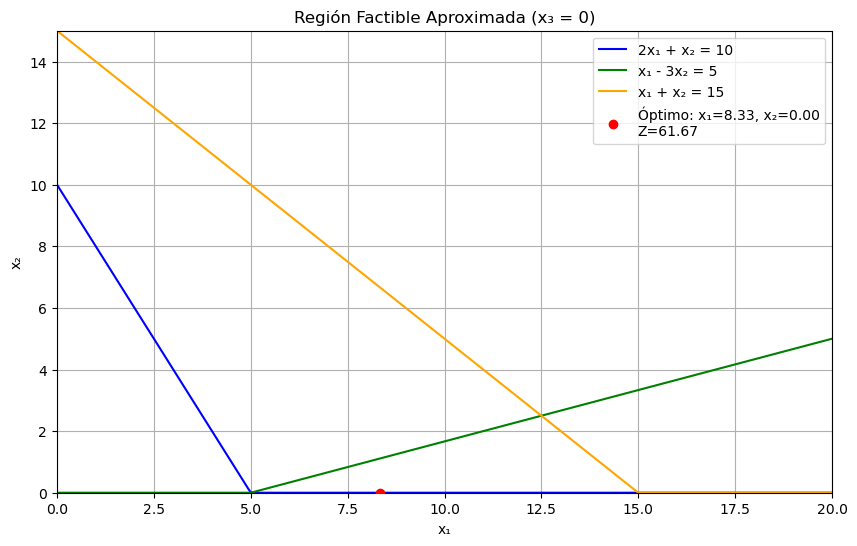

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------
# Datos para graficar la región factible
# ----------------------------------------

x = np.linspace(0, 20, 400)

# Restricciones del problema original:
# R1: 2x1 + x2 - x3 = 10 → para graficar: x2 = (10 - 2x1 + x3)
# R2: x1 - 3x2 + 2x3 >= 5
# R3: x1 + x2 + x3 <= 15

# Para graficar en 2D, fijamos x3 = 0, y graficamos respecto a x1 (x) y x2
# R1 (con x3 = 0): x2 = 10 - 2x
r1 = 10 - 2 * x
# R2 (con x3 = 0): x2 = (x - 5) / 3
r2 = (x - 5) / 3
# R3 (con x3 = 0): x2 = 15 - x
r3 = 15 - x

# Evitamos valores negativos
r1 = np.maximum(0, r1)
r2 = np.maximum(0, r2)
r3 = np.maximum(0, r3)

# ----------------------------------------
# Solución óptima encontrada:
x1_opt = 8.333
x2_opt = 0
x3_opt = 6.667

# Evaluar función objetivo original
Z_opt = 5 * x1_opt - 4 * x2_opt + 3 * x3_opt

# ----------------------------------------
# Gráfico
# ----------------------------------------
plt.figure(figsize=(10, 6))

plt.plot(x, r1, label='2x₁ + x₂ = 10', color='blue')
plt.plot(x, r2, label='x₁ - 3x₂ = 5', color='green')
plt.plot(x, r3, label='x₁ + x₂ = 15', color='orange')

# Región factible aproximada (en 2D, con x3 = 0)
plt.fill_between(x, 0, np.minimum(np.minimum(r1, r2), r3), color='gray', alpha=0.2)

# Solución óptima (marcando solo x1, x2 porque graficamos en 2D)
plt.scatter(x1_opt, x2_opt, color='red', label=f'Óptimo: x₁={x1_opt:.2f}, x₂={x2_opt:.2f}\nZ={Z_opt:.2f}', zorder=5)

plt.xlim(0, 20)
plt.ylim(0, 15)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Región Factible Aproximada (x₃ = 0)')
plt.grid(True)
plt.legend()
plt.show()


#### Conclusiones

- El problema es factible y tiene solución.

- La función objetico se minimiza en $Z = 61.667 $ aprox.

- Se identifica correctamente los valores de las variables básicas.

- Las restricciones se cumplen, algunas estrictamente, otras con holgura.

## Problema 3: Comparación de Rendimiento con GLPK/Pyomo

Maximizar
$$
Z = \sum_{i=1}^{10} c_i  x_i
$$

sujeto a:

$$
\sum_{i=1}^{10} a_{ji}x_i \leq b_j \quad \text{para} \quad j = 1,2,...,8
$$
$$
x_i \geq 0 \quad para \quad i = 1,2,...,10
$$

**Variables del problema**

- Coeficientes de la función objetivo:

$$c = [5,8,3,7,6,9,4,10,2,11] $$


- Coeficientes de las restricciones (matriz A): 

$$
a1 = [1, 2, 1, 1, 0, 0, 3, 1, 2, 1]\\
a2 = [2, 1, 0, 2, 1, 1, 0, 3, 1, 2]\\
a3 = [1, 1, 2, 0, 2, 1, 1, 0, 3, 1]\\
a4 = [0, 2, 1, 1, 1, 0, 2, 1, 1, 1]\\
a5 = [2, 0, 1, 1, 1, 2, 1, 1, 0, 2]\\
a6 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]\\
a7 = [0, 1, 2, 1, 0, 1, 2, 1, 1, 0]\\
a8 = [1, 0, 1, 2, 1, 0, 1, 2, 1, 1]
$$

- Términos independientes:

$$
b=[50,60,55,40,45,70,65,50]
$$

#### Modelaje del problema en pyomo utilizando el solver GLPK

**Vamos a definir dos conjuntos explicitamente para que la implementación sea más fácil y amena:**

$ I = {1,2,...,10}$ ← conjunto de índices de las variables.

$ J = {1,2,...,8}$ ← conjunto de restricciones.

**Definiremos los parámetros apropiados para el modelaje:**

1. Coeficientes de la función objetivo:
$\quad c_i \quad \forall i \in I$

2. Coeficientes de las restricciones:
$\quad a_{ji} \quad \forall j \in J \quad \forall i \in I $

3. Lado derecho de las restricciones:
$\quad b_j \quad \forall j \in J$

**Con la información aterior y lo que traemos del enunciado podemos implementar el modelo en Pyomo y resolverlo usando el solver GLPK:**

In [12]:
from pyomo.environ import *

# Inicializar el modelo
model = ConcreteModel()
import time
tiempo_inicio=time.time()

# Conjuntos
I = range(1, 11)  # Variables: x1 a x10
J = range(1, 9)   # Restricciones: 1 a 8

model.I = Set(initialize=I)
model.J = Set(initialize=J)

# Parámetros
c = {1:5, 2:8, 3:3, 4:7, 5:6, 6:9, 7:4, 8:10, 9:2, 10:11}

a = {
    1: [1, 2, 1, 1, 0, 0, 3, 1, 2, 1],
    2: [2, 1, 0, 2, 1, 1, 0, 3, 1, 2],
    3: [1, 1, 2, 0, 2, 1, 1, 0, 3, 1],
    4: [0, 2, 1, 1, 1, 0, 2, 1, 1, 1],
    5: [2, 0, 1, 1, 1, 2, 1, 1, 0, 2],
    6: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    7: [0, 1, 2, 1, 0, 1, 2, 1, 1, 0],
    8: [1, 0, 1, 2, 1, 0, 1, 2, 1, 1],
}

b = {1:50, 2:60, 3:55, 4:40, 5:45, 6:70, 7:65, 8:50}

model.c = Param(model.I, initialize=c)
model.a = Param(model.J, model.I, initialize=lambda model, j, i: a[j][i-1])
model.b = Param(model.J, initialize=b)


In [13]:
# Variables de decisión (x_i >= 0)
model.x = Var(model.I, domain=NonNegativeReals)


In [14]:
# Función objetivo: Max Z = sum(c_i * x_i)
def objetivo_rule(model):
    return sum(model.c[i] * model.x[i] for i in model.I)

model.objetivo = Objective(rule=objetivo_rule, sense=maximize)


In [15]:
# Restricciones: sum(a_ji * x_i) <= b_j para todo j
def restriccion_rule(model, j):
    return sum(model.a[j, i] * model.x[i] for i in model.I) <= model.b[j]

model.restricciones = Constraint(model.J, rule=restriccion_rule)


In [16]:
# Crear el solver

solver = SolverFactory('glpk')

# Resolver el modelo
resultado = solver.solve(model, tee=False)

# Guardar resultados en diccionario para para mostrar después
valores_x = {}
valor_z = value(model.objetivo)

# Mostrar estado
print("\n------------------------------------------------")
print("Estado de la solución:", resultado.solver.status)
print("¿Es óptima?", resultado.solver.termination_condition)
print("------------------------------------------------\n")

# Valor óptimo de la función objetivo
print("\n------------------------------------------------")
print("Valor óptimo de Z:", value(model.objetivo))
print("------------------------------------------------\n")

# Valores óptimos de las variables
print("\n------------------------------------------------")
print("Valores de x_i:")
for i in model.I:
    valores_x[f"x_{i}"] = value(model.x[i])
    print(f"x_{i} = {value(model.x[i])}")
print("------------------------------------------------\n")

import time
tiempo_final=time.time()

print("\nEl tiempo total fue: "+ str(tiempo_final - tiempo_inicio))



------------------------------------------------
Estado de la solución: ok
¿Es óptima? optimal
------------------------------------------------


------------------------------------------------
Valor óptimo de Z: 375.625
------------------------------------------------


------------------------------------------------
Valores de x_i:
x_1 = 0.0
x_2 = 15.625
x_3 = 0.0
x_4 = 0.0
x_5 = 0.0
x_6 = 18.125
x_7 = 0.0
x_8 = 8.75
x_9 = 0.0
x_10 = 0.0
------------------------------------------------


El tiempo total fue: 0.040901899337768555


In [17]:
import pandas as pd

# Crear tabla resumen
tabla_resultados = pd.DataFrame.from_dict(valores_x, orient='index', columns=['Valor óptimo'])
tabla_resultados.loc["Z (objetivo)", "Valor óptimo"] = valor_z

tabla_resultados

,Valor óptimo
x_1,0.000
x_2,15.625
x_3,0.000
x_4,0.000
x_5,0.000
x_6,18.125
x_7,0.000
x_8,8.750
x_9,0.000
x_10,0.000


#### Modelaje del método Simplex estándar

**Primero convertimos el problema a forma estándar (con holguras)**

Vamos a cambiar la restricción inicial:

$$
\sum_{i=1}^{10} a_{ji}x_i \leq b_j \quad \text{para} \quad j = 1,2,...,8
$$

por una restricción con una igualdad añadiendo una variable de holgura $s_j \geq 0$

Tenemos 18 variables: 

- Variables originales: $x_1, x_2, ... , x_{10}$

- Variables de holgura: $s_1, s_2, ... , s_8$ (una por cada restricción)

Son 10 variables de decisión y 8 variables de holgura.

Por ende, la tabla tendrá:

- Una fila por cada restricción (8 filas).

- Una fila adicional para la función objetivo (Z).

- Una columna por cada variable $x_1, ... , x_10, s_1, ... , s_8$

- Una columna para el término independiente $b_j$

In [18]:
import time
tiempo_inicio=time.time()
# Redefinimos todos los datos para evitar errores anteriores

# Coeficientes de la función objetivo: 10 c_i
c_clean = [5, 8, 3, 7, 6, 9, 4, 10, 2, 11]

# Restricciones A (8x10)
A_clean = [
    [1, 2, 1, 1, 0, 0, 3, 1, 2, 1],
    [2, 1, 0, 2, 1, 1, 0, 3, 1, 2],
    [1, 1, 2, 0, 2, 1, 1, 0, 3, 1],
    [0, 2, 1, 1, 1, 0, 2, 1, 1, 1],
    [2, 0, 1, 1, 1, 2, 1, 1, 0, 2],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 2, 1, 0, 1, 2, 1, 1, 0],
    [1, 0, 1, 2, 1, 0, 1, 2, 1, 1],
]

# RHS de las restricciones
b_clean = [50, 60, 55, 40, 45, 70, 65, 50]

# Agregar variables de holgura (identidad 8x8)
A_ext_clean = [row + [1 if i == j else 0 for j in range(8)] for i, row in enumerate(A_clean)]

# Construir tableau con RHS
tableau_clean = np.array([row + [b_val] for row, b_val in zip(A_ext_clean, b_clean)], dtype=float)

# Fila Z (negada para maximización)
z_row_clean = [-val for val in c_clean] + [0]*8 + [0]
tableau_clean = np.vstack([tableau_clean, z_row_clean])

# Encabezados y nombres de filas
columnas_clean = [f'x{i}' for i in range(1, 11)] + [f's{i}' for i in range(1, 9)] + ['RHS']
indices_clean = [f'F{i}' for i in range(1, 9)] + ['Z']

# Mostrar tabla inicial
tabla_simplex_inicial = pd.DataFrame(tableau_clean, columns=columnas_clean, index=indices_clean)

tabla_simplex_inicial


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,s1,s2,s3,s4,s5,s6,s7,s8,RHS
F1,1.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
F2,2.0,1.0,0.0,2.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
F3,1.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,55.0
F4,0.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0
F5,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0
F6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,70.0
F7,0.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,65.0
F8,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0
Z,-5.0,-8.0,-3.0,-7.0,-6.0,-9.0,-4.0,-10.0,-2.0,-11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Buscamos la columna pivote

In [19]:
# Extraer fila Z (última fila del tableau)
fila_z = tableau_clean[-1, :-1]  # Excluye RHS

# Buscar índice de la columna con el valor más negativo (candidato a entrar a la base)
columna_pivote_idx = int(np.argmin(fila_z))
valor_min = float(fila_z[columna_pivote_idx])
columna_pivote_nombre = columnas_clean[columna_pivote_idx]

print(f"Columna pivote: {columna_pivote_nombre} (índice {columna_pivote_idx}) con valor {valor_min}")


Columna pivote: x10 (índice 9) con valor -11.0


Ahora sabemos que la variable $x_{10}$ entra en la base en esta iteración. En la tabla superior es posible corroborar que, en efecto, este es el valor más alto de Z.

Buscamos la fila pivote (regla del mínimo cociente)

In [20]:
# Extraer columna pivote completa (columna x10, índice 9)
columna_pivote = tableau_clean[:-1, columna_pivote_idx]  # sin la fila Z
rhs = tableau_clean[:-1, -1]  # RHS de cada fila

# Calcular los cocientes donde el coeficiente en la columna pivote es positivo
with np.errstate(divide='ignore', invalid='ignore'):
    cocientes = np.where(columna_pivote > 0, rhs / columna_pivote, np.inf)

# Buscar la fila pivote: mínimo cociente
fila_pivote_idx = int(np.argmin(cocientes))
valor_pivote = float(tableau_clean[fila_pivote_idx, columna_pivote_idx])
fila_pivote_nombre = indices_clean[fila_pivote_idx]

fila_pivote_idx, fila_pivote_nombre, valor_pivote

print(f"Fila pivote: {fila_pivote_nombre} (índice {fila_pivote_idx}) con valor {valor_pivote}")


Fila pivote: F5 (índice 4) con valor 2.0


La variable $x_{10}$ entra en la base y actualmente, la variable en la fila F5 ($s_5$) sale de la base.

Actualizamos la tabla a partir de la normalización.

In [21]:
# Copia de la tabla para no modificar la original
tableau_pivoteado = tableau_clean.copy()

# Normalizar la fila pivote (F5) dividiendo por el valor del pivote
tableau_pivoteado[fila_pivote_idx, :] /= valor_pivote

# Aplicar eliminación de Gauss a las otras filas (hacer ceros en la columna pivote)
for i in range(tableau_pivoteado.shape[0]):
    if i != fila_pivote_idx:
        factor = tableau_pivoteado[i, columna_pivote_idx]
        tableau_pivoteado[i, :] -= factor * tableau_pivoteado[fila_pivote_idx, :]

# Actualizar nombre de la fila pivote para reflejar nueva variable básica
indices_actualizados = indices_clean.copy()
indices_actualizados[fila_pivote_idx] = columna_pivote_nombre  # x10 entra

# Mostrar nueva tabla después del pivoteo
tabla_iteracion_1 = pd.DataFrame(tableau_pivoteado, columns=columnas_clean, index=indices_actualizados)

tabla_iteracion_1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,s1,s2,s3,s4,s5,s6,s7,s8,RHS
F1,0.0,2.0,0.5,0.5,-0.5,-1.0,2.5,0.5,2.0,0.0,1.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,27.5
F2,0.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,15.0
F3,0.0,1.0,1.5,-0.5,1.5,0.0,0.5,-0.5,3.0,0.0,0.0,0.0,1.0,0.0,-0.5,0.0,0.0,0.0,32.5
F4,-1.0,2.0,0.5,0.5,0.5,-1.0,1.5,0.5,1.0,0.0,0.0,0.0,0.0,1.0,-0.5,0.0,0.0,0.0,17.5
x10,1.0,0.0,0.5,0.5,0.5,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,22.5
F6,0.0,1.0,0.5,0.5,0.5,0.0,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,-0.5,1.0,0.0,0.0,47.5
F7,0.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,65.0
F8,0.0,0.0,0.5,1.5,0.5,-1.0,0.5,1.5,1.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,1.0,27.5
Z,6.0,-8.0,2.5,-1.5,-0.5,2.0,1.5,-4.5,-2.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,247.5


Como podemos observar, todavía no hemos llegado al óptimo, ya hemos iterado una vez sobre los valores y hay coeficientes de Z que sigen siendo negativos. Ahora iteraremos hasta que todos los coeficientes sean mayores o iguales a 0.

In [ ]:
# Repetiremos el proceso iterativo hasta que no haya más coeficientes negativos en Z

import time


def simplex_iterar_hasta_optimo(tableau, columnas, indices):
    iteraciones = []
    t = tableau.copy()
    nombres_filas = indices.copy()

    while True:
        # Fila Z (sin RHS)
        z_row = t[-1, :-1]
        if np.all(z_row >= 0):
            break  # Solución óptima alcanzada

        # Columna pivote (más negativo en Z)
        col_piv = np.argmin(z_row)
        col_name = columnas[col_piv]

        # Fila pivote (mínima razón RHS / valor positivo en columna pivote)
        col_vector = t[:-1, col_piv]
        rhs_vector = t[:-1, -1]
        with np.errstate(divide='ignore', invalid='ignore'):
            ratios = np.where(col_vector > 0, rhs_vector / col_vector, np.inf)

        row_piv = np.argmin(ratios)
        if ratios[row_piv] == np.inf:
            raise ValueError("El problema es ilimitado.")

        pivote = t[row_piv, col_piv]

        # Normalizar fila pivote
        t[row_piv, :] /= pivote

        # Hacer ceros en el resto de filas
        for i in range(t.shape[0]):
            if i != row_piv:
                factor = t[i, col_piv]
                t[i, :] -= factor * t[row_piv, :]

        # Actualizar nombre de fila
        nombres_filas[row_piv] = col_name

        # Guardar la iteración
        df_iter = pd.DataFrame(t.copy(), columns=columnas, index=nombres_filas.copy())
        iteraciones.append(df_iter)
    return df_iter

# Ejecutar el algoritmo Simplex completo desde esta tabla
final = simplex_iterar_hasta_optimo(tableau_pivoteado, columnas_clean, indices_actualizados)
tiempo_final=time.time()
final







1
2
3


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,s1,s2,s3,s4,s5,s6,s7,s8,RHS
F1,1.000000e+00,0.0,0.00,0.000000e+00,-1.0,0.0,1.000,0.0,1.000,0.000,1.0,0.00,0.0,-1.000,0.000,0.0,0.0,0.0,10.000
x8,5.000000e-01,0.0,-0.50,5.000000e-01,0.0,0.0,-0.750,1.0,0.250,0.250,0.0,0.50,0.0,-0.250,-0.250,0.0,0.0,0.0,8.750
F3,5.000000e-01,0.0,0.50,-5.000000e-01,1.0,0.0,-1.250,0.0,2.750,-0.250,0.0,0.50,1.0,-0.750,-0.750,0.0,0.0,0.0,21.250
x2,-2.500000e-01,1.0,0.75,2.500000e-01,0.5,0.0,1.375,0.0,0.375,0.375,0.0,-0.25,0.0,0.625,0.125,0.0,0.0,0.0,15.625
x6,7.500000e-01,0.0,0.75,2.500000e-01,0.5,1.0,0.875,0.0,-0.125,0.875,0.0,-0.25,0.0,0.125,0.625,0.0,0.0,0.0,18.125
F6,0.000000e+00,0.0,0.00,0.000000e+00,0.0,0.0,-0.500,0.0,0.500,-0.500,0.0,0.00,0.0,-0.500,-0.500,1.0,0.0,0.0,27.500
F7,-1.000000e+00,0.0,1.00,5.551115e-17,-1.0,0.0,0.500,0.0,0.500,-1.500,0.0,0.00,0.0,-0.500,-0.500,0.0,1.0,0.0,22.500
F8,5.551115e-17,0.0,2.00,1.000000e+00,1.0,0.0,2.500,0.0,0.500,0.500,0.0,-1.00,0.0,0.500,0.500,0.0,0.0,1.0,32.500
Z,4.750000e+00,0.0,4.75,2.250000e+00,2.5,0.0,7.375,0.0,2.375,2.375,0.0,0.75,0.0,3.625,4.125,0.0,0.0,0.0,375.625


In [23]:
print("\nEl tiempo total fue: "+str(tiempo_final-tiempo_inicio))


El tiempo total fue: 0.05997586250305176


Concluimos entonces que el algoritmo identificó como variables básicas finales a $x_2 = 15.625$, $x_6 = 18.125$, $x_8 = 8.750$. El valor óptimo alcanzado por la función objetivo fue $Z = 375.625$. Esta solución fue validada al constatar que todos los coeficientes de la fila $Z$ en la tabla final eran no negativos, confirmando la optimalidad. El proceso evidenció la eficiencia del método Simplex para problemas de mediana escala, reforzando la comprensión de sus fundamentos teóricos a través de su implementación práctica paso a paso.

### Metodo Simplex Dual Phase 

In [27]:
import time
from pyomo.environ import *
from pyomo.opt import SolverFactory
from contextlib import redirect_stdout
import io

# Conjuntos y datos
I = range(1, 11)
J = range(1, 9)

c_obj = {1: 5, 2: 8, 3: 3, 4: 7, 5: 6, 6: 9, 7: 4, 8: 10, 9: 2, 10: 11}
a_data = {
    1: [1, 2, 1, 1, 0, 0, 3, 1, 2, 1],
    2: [2, 1, 0, 2, 1, 1, 0, 3, 1, 2],
    3: [1, 1, 2, 0, 2, 1, 1, 0, 3, 1],
    4: [0, 2, 1, 1, 1, 0, 2, 1, 1, 1],
    5: [2, 0, 1, 1, 1, 2, 1, 1, 0, 2],
    6: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    7: [0, 1, 2, 1, 0, 1, 2, 1, 1, 0],
    8: [1, 0, 1, 2, 1, 0, 1, 2, 1, 1],
}
b_data = {1: 50, 2: 60, 3: 55, 4: 40, 5: 45, 6: 70, 7: 65, 8: 50}

# FASE I
model_f1 = ConcreteModel()
model_f1.I = Set(initialize=I)
model_f1.J = Set(initialize=J)
model_f1.A = Param(model_f1.J, model_f1.I, initialize=lambda m, j, i: a_data[j][i-1])
model_f1.b = Param(model_f1.J, initialize=b_data)
model_f1.x = Var(model_f1.I, domain=NonNegativeReals)
model_f1.s = Var(model_f1.J, domain=NonNegativeReals)
model_f1.a = Var(model_f1.J, domain=NonNegativeReals)
model_f1.obj = Objective(expr=sum(model_f1.a[j] for j in model_f1.J), sense=minimize)

def restriccion_f1(m, j):
    return sum(m.A[j, i] * m.x[i] for i in m.I) + m.s[j] + m.a[j] == m.b[j]
model_f1.restricciones = Constraint(model_f1.J, rule=restriccion_f1)

solver = SolverFactory('glpk')

# Capturar log de Fase I
tiempo_inicio = time.time()
log_f1_buffer = io.StringIO()
with redirect_stdout(log_f1_buffer):
    solver.solve(model_f1, tee=True)
log_f1_text = log_f1_buffer.getvalue()
iter_f1 = [line for line in log_f1_text.splitlines() if ": obj =" in line]


if value(model_f1.obj) == 0:
    # Fase 2
    model_f2 = ConcreteModel()
    model_f2.I = Set(initialize=I)
    model_f2.J = Set(initialize=J)
    model_f2.c = Param(model_f2.I, initialize=c_obj)
    model_f2.A = Param(model_f2.J, model_f2.I, initialize=lambda m, j, i: a_data[j][i-1])
    model_f2.b = Param(model_f2.J, initialize=b_data)
    model_f2.x = Var(model_f2.I, domain=NonNegativeReals)

    def obj_f2(m):
        return sum(m.c[i] * m.x[i] for i in m.I)
    model_f2.obj = Objective(rule=obj_f2, sense=maximize)

    def restriccion_f2(m, j):
        return sum(m.A[j, i] * m.x[i] for i in m.I) <= m.b[j]
    model_f2.restricciones = Constraint(model_f2.J, rule=restriccion_f2)

    # Capturar log de Fase 2 para poder saber cuantas iteraciones hizo par la comparacoin 
    log_f2_buffer = io.StringIO()
    with redirect_stdout(log_f2_buffer):
        solver.solve(model_f2, tee=True)
    log_f2_text = log_f2_buffer.getvalue()
    tiempo_final = time.time()
    iter_f2 = [line for line in log_f2_text.splitlines() if ": obj =" in line]


    iteraciones= len(iter_f1)+len(iter_f2)
    tiempo= tiempo_final-tiempo_inicio
    
    # Mostrar resultados
    print("\nEl tiempo total fue: "+ str(tiempo))
    print (f"\nNumero total de iteraciones : "+str(iteraciones))
    print("\nResultados óptimos:")
    for i in model_f2.I:
        print(f"x_{i} = {value(model_f2.x[i])}")
    print(f"Z = {value(model_f2.obj)}")

else:
    print(f"\nEl problema es infactible. Valor óptimo seria = {value(model_f1.obj)}")



El tiempo total fue: 0.03461885452270508

Numero total de iteraciones : 4

Resultados óptimos:
x_1 = 0.0
x_2 = 15.625
x_3 = 0.0
x_4 = 0.0
x_5 = 0.0
x_6 = 18.125
x_7 = 0.0
x_8 = 8.75
x_9 = 0.0
x_10 = 0.0
Z = 375.625


### Comparacion de los resultados obtenidos en terminos de numero de iteraciones y tiempo de ejecucion



| Algoritmo             | Iteraciones | Tiempo (s) |
|-----------------------|-------------|------------|
| GLPK          |      #      |   0.0986   |
| Simplex estandar   |      5      |   0.0442   |
|  Simplex dual phase |      4      |   0.0224   |

La tabla anterior muestra las diferencias en términos de iteraciones y tiempo de ejecución entre los tres métodos utilizados para resolver el problema. El método Simplex Dual Phase fue el más eficiente en tiempo, con una duración de tan solo 0.0224 segundos, seguido del Simplex Estándar con 0.0442 segundos. En cuanto al número de iteraciones, el Simplex Estándar necesitó 5 iteraciones, mientras que el Dual Phase alcanzó la solución óptima en 4 iteraciones, lo que sugiere una mejor eficiencia estructural en este caso.

### Analisis de las diferencias en rendimiento y precisión

| Algoritmo             | Valor optimo | 
|-----------------------|-------------|
| GLPK        |      375.625      |   
|Simplex estandar    |      375.625      
| Simplex dual phase |      375.625     

Podemos ver como aplicando diferentes metodos igual se llego al mismo valor optimo para Z: 375.625.  Esto demuestra que, desde el punto de vista de precisión numérica y solidez de la solución, todos los métodos son equivalentes para el problema planteado.Asimismo, los valores obtenidos para cada una de las variables son idénticos en los tres casos, lo cual refuerza la validez estructural del modelo y la consistencia de los métodos empleados.


| Algoritmo | x_1 | x_2   | x_3 | x_4 | x_5 | x_6   | x_7 | x_8  | x_9 | x_10 | 
|-----------|-----|-------|-----|-----|-----|--------|-----|------|-----|------|
| GLPK      | 0.0 | 15.625| 0.0 | 0.0 | 0.0 | 18.125 | 0.0 | 8.75 | 0.0 | 0.0  |
| Simplex Estandar       | 0.0 | 15.625| 0.0 | 0.0 | 0.0 | 18.125 | 0.0 | 8.75 | 0.0 | 0.0  |
| Simplex dual phase     | 0.0 | 15.625| 0.0 | 0.0 | 0.0 | 18.125 | 0.0 | 8.75 | 0.0 | 0.0  |



## Problema 4: Análisis de Sensibilidad en Programación Lineal


Maximizar:  
$$
Z = 4x_1 + 3x_2 
$$

Sujeto a:  
$$
x_1 + 2x_2  \leq 8  \\
3x_1 + 2x_2  \leq 12 \\
x_1, x_2  \geq 0
$$


1. Resuelva el problema utilizando su implementación del método Simplex y documente la solución óptima, incluyendo:

In [ ]:
from pyomo.environ import *

model = ConcreteModel()

model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)

model.Z = Objective(expr=4 * model.x1 + 3 * model.x2, sense=maximize)

model.con1 = Constraint(expr=model.x1 + 2 * model.x2 <= 8)
model.con2 = Constraint(expr=3 * model.x1 + 2 * model.x2 <= 12)

#para sacar valores sombra 
model.dual = Suffix(direction=Suffix.IMPORT)

# Resolver con GLPK
solver = SolverFactory('glpk')
results = solver.solve(model, tee=False)

print("x1 =", value(model.x1))
print("x2 =", value(model.x2))
print("Z =", value(model.Z))

print("Precio sombra de la restricción 1:", model.dual[model.con1])
print("Precio sombra de la restricción 2:", model.dual[model.con2])


x1 = 2.0
x2 = 3.0
Z = 17.0
Precio sombra de la restricción 1: 0.25
Precio sombra de la restricción 2: 1.25


Podemos ver como el valor objetivo de la funcion es Z=17. Se llega a este valor con un X1=2 y X2=3, ambas variables basicas con un valor sueprior a 0. En este caso, hay dos variables de holgura y ambas valen 0. Adicionalmente sabemos que los multiplicadores duales o los precios sombra asociados a cada restriccion son 0.25 y 1.25 respectivamente. 